In [28]:
# import seluruh library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
np.random.seed(42)

n = 1000

In [30]:
luas_tanah = np.round(np.random.normal(loc=150, scale=50, size=n))
luas_bangunan = np.round(luas_tanah * 0.5 + np.random.normal(loc=0, scale=10, size=n))
kamar_tidur = (luas_bangunan // 20)
kamar_mandi = (luas_bangunan // 30)

harga_per_m2_tanah = 500000
harga_per_m2_bangunan = 800000
harga_per_kamar_tidur = 300000
harga_per_kamar_mandi = 250000

harga_rumah = np.round(luas_tanah * harga_per_m2_tanah + luas_bangunan * harga_per_m2_bangunan + kamar_tidur * harga_per_kamar_tidur + kamar_mandi * harga_per_kamar_mandi + np.random.normal(loc=0, scale=100000, size=n))

In [31]:
df = pd.DataFrame({
    'Luas Tanah': luas_tanah,
    'Luas Bangunan': luas_bangunan,
    'Kamar Tidur': kamar_tidur,
    'Kamar Mandi': kamar_mandi,
    'Harga Rumah': harga_rumah
})

df.to_csv('data_harga_rumah.csv', index=False)

In [32]:
df = pd.read_csv('data_harga_rumah.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Luas Tanah     1000 non-null   float64
 1   Luas Bangunan  1000 non-null   float64
 2   Kamar Tidur    1000 non-null   float64
 3   Kamar Mandi    1000 non-null   float64
 4   Harga Rumah    1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


,Luas Tanah,Luas Bangunan,Kamar Tidur,Kamar Mandi,Harga Rumah
0,175.0,101.0,5.0,3.0,170482482.0
1,143.0,81.0,4.0,2.0,137985548.0
2,182.0,92.0,4.0,3.0,166470758.0
3,226.0,107.0,5.0,3.0,200819204.0
4,138.0,76.0,3.0,2.0,131010639.0


In [33]:
x = df[['Luas Tanah', 'Luas Bangunan', 'Kamar Tidur', 'Kamar Mandi']]
y = df[['Harga Rumah']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 79322.44780071883
Mean Squared Error (MSE): 10006123549.864151
R-squared (R^2): 0.9999951683277615


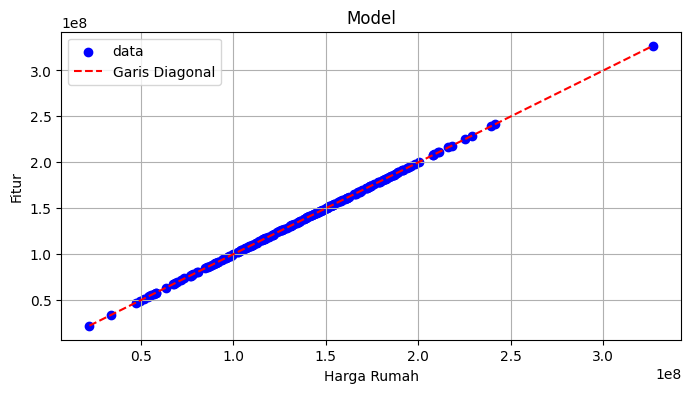

In [36]:
plt.figure(figsize=(8, 4))

plt.scatter(y_test, y_pred, color='blue', label='data')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Garis Diagonal')

plt.title('Model')
plt.xlabel('Harga Rumah')
plt.ylabel('Fitur')
plt.legend()
plt.grid(True)
plt.show()